In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [2]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27638,35,blue-collar,married,basic.9y,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
28484,30,admin.,single,university.degree,no,no,yes,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,yes
36471,31,services,married,high.school,no,no,no,cellular,jun,wed,...,4,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,yes
1322,33,blue-collar,divorced,basic.6y,unknown,yes,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12004,48,blue-collar,married,high.school,no,yes,yes,telephone,jun,thu,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.955,5228.1,yes


In [3]:
# Verificamos valores nulos
missing_values_count = df.isnull().sum()
missing_values_count

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df.nunique().sort_values()

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [5]:
# Columnas con valores "yes" y "no"
yes_no_columns = ['default', 'housing', 'loan', 'y']

# Convertir "yes" a 1 y "no" a 0 usando .map directamente
for col in yes_no_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Verificar las conversiones
print(df[yes_no_columns].head())

   default  housing  loan  y
0      0.0      0.0   0.0  0
1      NaN      0.0   0.0  0
2      0.0      1.0   0.0  0
3      0.0      0.0   0.0  0
4      0.0      0.0   1.0  0


In [6]:
missing_values_count = df.isnull().sum()
missing_values_count

age                  0
job                  0
marital              0
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [7]:
# Imputación de datos donde hay NaN

mean_default = df['default'].mean()
df =  df.replace(np.nan, mean_default)

mean_housing = df['housing'].mean()
df =  df.replace(np.nan, mean_housing)

mean_loan = df['loan'].mean()
df =  df.replace(np.nan, mean_loan)

In [8]:
missing_values_count = df.isnull().sum()
missing_values_count

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

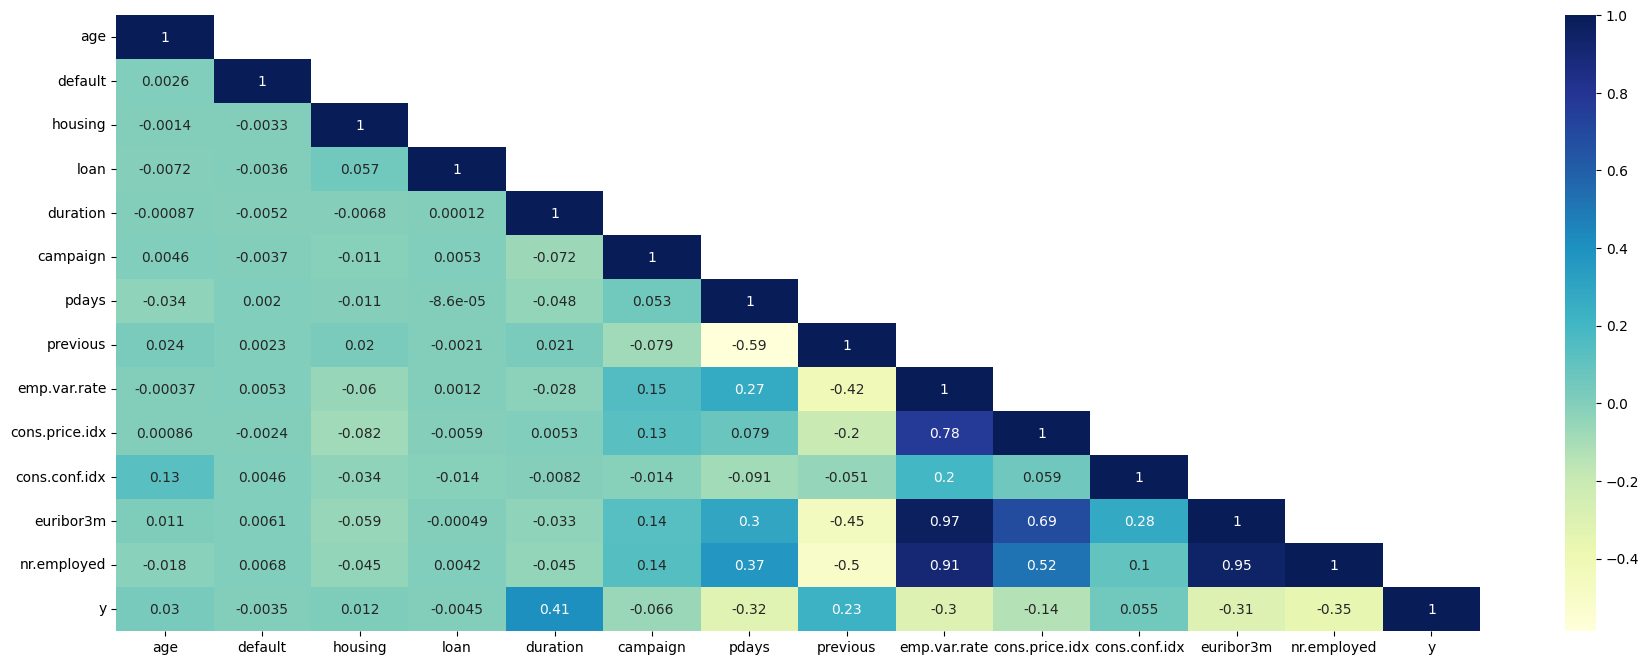

In [9]:
# Matriz de correlación y mapa de calor para eliminar las variables que tengan mayor correlación
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(22,8))
corr_df = corr = df_numeric.corr(method = "pearson")
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap="YlGnBu", annot=True)

In [10]:
# Eliminar variables que tengan alta correlación y/o no sean necesarias
df.drop("euribor3m", axis=1, inplace=True)
df.drop("nr.employed",axis=1, inplace=True)
df.drop("emp.var.rate",axis=1, inplace=True)
df.drop("cons.price.idx",axis=1, inplace=True)
df.drop("pdays",axis=1, inplace=True)
df.drop("previous",axis=1, inplace=True)

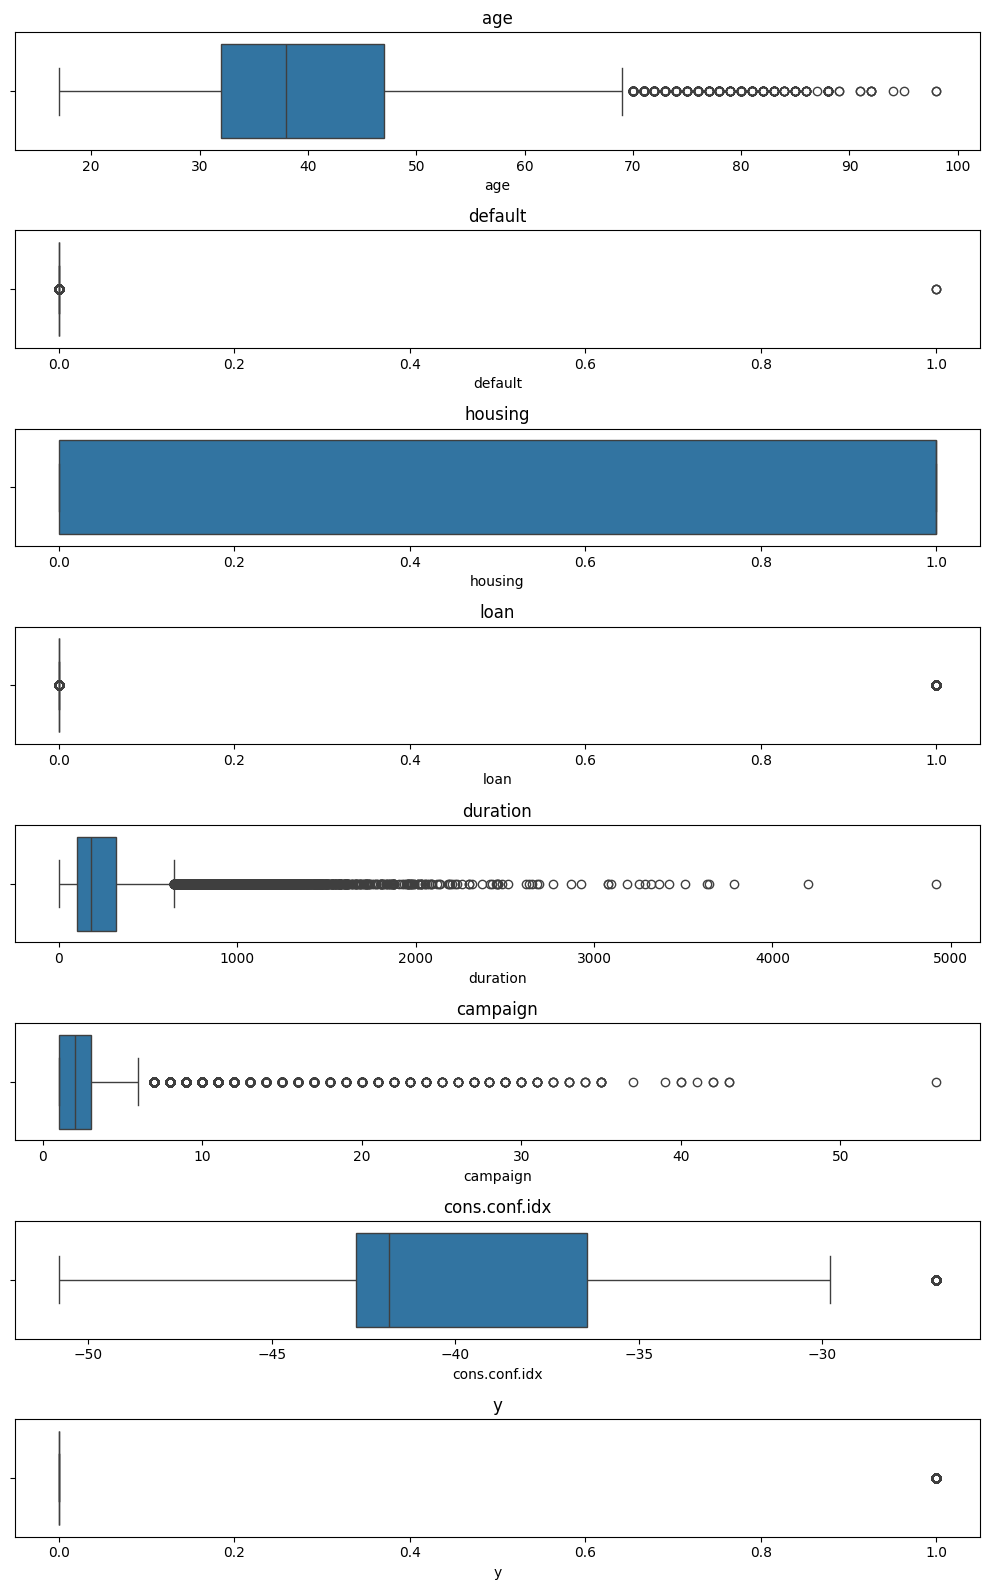

In [11]:
# Continuando con el Feature Enginneering, observamos las columnas numericas visualmente para encontrar cuales tienen muchos outliers
df_numeric = df.select_dtypes(include='number')
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax = axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [12]:
# Ahora seleccionamos las columnas con muchos outliers para poder analizar correctamente la data
# Lista de columnas con outliers
columns_with_outliers= ['age', 'duration', 'campaign']

# Definir una función para eliminar outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers en las columnas especificadas
for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Ahora df no tiene outliers en las columnas especificadas

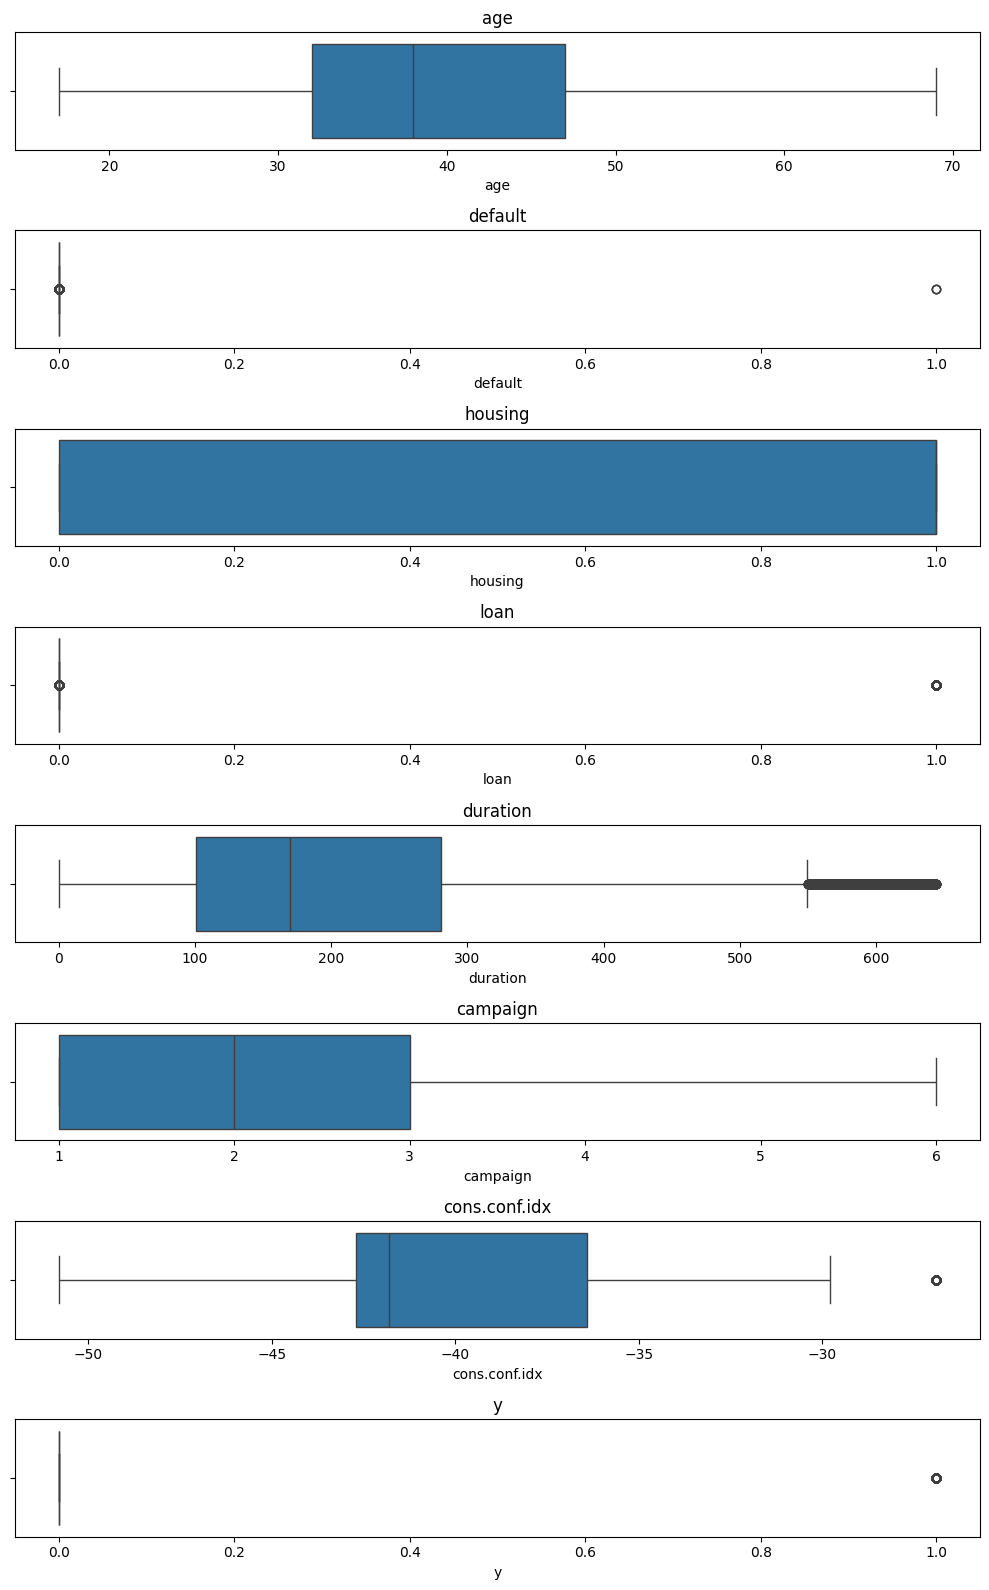

In [13]:
# Comprobamos ahora con las columnas seleccionadas
df_numeric = df.select_dtypes(include='number')
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax = axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [14]:
df.shape

(35535, 15)

In [15]:
df.describe()

,age,default,housing,loan,duration,campaign,cons.conf.idx,y
count,35535.000000,35535.000000,35535.000000,35535.000000,35535.000000,35535.000000,35535.000000,35535.000000
mean,39.599522,0.000104,0.525062,0.151459,206.796173,2.044069,-40.523166,0.080878
std,9.678283,0.009188,0.499376,0.358497,140.074780,1.284171,4.623639,0.272652
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-50.800000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,101.000000,1.000000,-42.700000,0.000000
50%,38.000000,0.000000,1.000000,0.000000,170.000000,2.000000,-41.800000,0.000000
75%,47.000000,0.000000,1.000000,0.000000,280.500000,3.000000,-36.400000,0.000000
max,69.000000,1.000000,1.000000,1.000000,644.000000,6.000000,-26.900000,1.000000


In [16]:
# Dividir dataset entre training y test (70:30) 
df2 = df.copy()
df2.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.conf.idx,y
20702,29,technician,married,university.degree,0.000000,0.0,0.0,cellular,aug,wed,201,1,nonexistent,-36.1,0
32466,34,admin.,single,university.degree,0.000000,0.0,0.0,cellular,may,fri,134,2,nonexistent,-46.2,0
37178,32,technician,married,university.degree,0.000000,1.0,0.0,cellular,aug,thu,148,2,success,-31.4,0
26617,29,blue-collar,single,basic.9y,0.000000,1.0,0.0,cellular,nov,thu,249,1,nonexistent,-42.0,0
19833,37,admin.,married,high.school,0.000092,0.0,0.0,cellular,aug,fri,45,1,nonexistent,-36.1,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X = df2.drop('y', axis=1)
y=df2['y']

X = pd.get_dummies(X, drop_first=True)

# Imputar valores faltantes
# imputer = SimpleImputer(strategy='mean')
# X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=1)

In [18]:
y_test.head(3)

22880    0
20784    0
36987    0
Name: y, dtype: int64

In [19]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df2.index))* 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df2.index))* 100))

70.00% data is in training set
30.00% data is in test set


In [20]:
# Prueba Simple con Regresión Logística
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Adapta el modelo a los X_train y y_train (entrenamiento)
model = LogisticRegression(class_weight={0:0.15, 1:0.85}, solver='liblinear')
model.fit(X_train, y_train)

# Hace la predicción en X_test y la guarda en y_predict
y_predict = model.predict(X_test)

In [21]:
# La predicción no es más que un conjunto de 0s y 1s que se aplican al mismo dataset
y_predict[0:100]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [22]:
X_test

,age,default,housing,loan,duration,campaign,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
22880,32,0.000000,1.0,1.0,69,2,-36.1,False,False,False,...,False,False,False,False,True,False,False,False,True,False
20784,33,0.000092,1.0,0.0,31,1,-36.1,False,False,False,...,False,False,False,False,False,False,False,True,True,False
36987,57,0.000000,0.0,0.0,64,1,-33.6,False,False,False,...,False,False,False,False,False,False,False,False,True,False
38427,35,0.000000,0.0,0.0,360,5,-26.9,False,False,False,...,False,False,True,False,False,True,False,False,True,False
331,36,0.000000,1.0,0.0,121,2,-36.4,True,False,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30179,40,0.000000,0.0,0.0,328,1,-47.1,True,False,False,...,False,False,False,False,False,True,False,False,True,False
40775,25,0.000000,0.0,0.0,185,1,-37.5,False,False,False,...,False,False,False,True,True,False,False,False,True,False
16652,42,0.000000,0.0,0.0,185,1,-42.7,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4137,33,0.000000,1.0,0.0,140,2,-36.4,True,False,False,...,True,False,False,False,True,False,False,False,True,False


In [23]:
# Construye un dataset con el valor original y la predicción
z = X_test.copy()
z['Response real'] = y_test
z['Response prediccion'] = y_predict
z[['Response real', 'Response prediccion']].head(40)

,Response real,Response prediccion
22880,0,0
20784,0,0
36987,0,0
38427,1,1
331,0,0
24786,0,0
28917,0,1
6041,0,0
36535,0,0
37076,0,1


Text(0.5, 1.0, 'Matriz de Confusión')

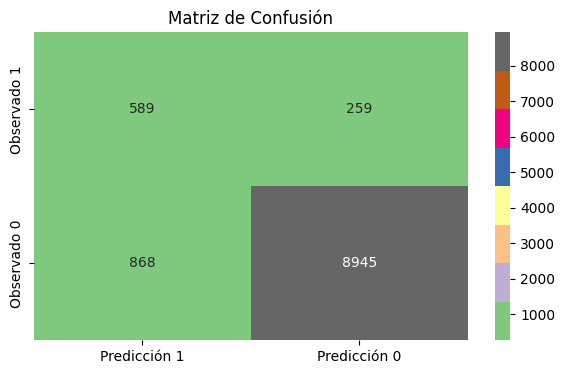

In [24]:
# Genera la matriz de confusión
# Que no es más que la comparación de los valores observados y las predicciones, para saber que tan buena es la calidad del modelo

cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0]) 
df_cm = pd.DataFrame(cm, index = [i for i in ["Observado 1","Observado 0"]],
                     columns = [i for i in["Predicción 1", "Predicción 0"]])
plt.figure(figsize = (7,4))
sns.heatmap(df_cm, annot=True, cmap='Accent', fmt='d').set_title("Matriz de Confusión")

In [25]:
df_cm

,Predicción 1,Predicción 0
Observado 1,589,259
Observado 0,868,8945


In [26]:
# Calculo manual de Falsos Positivos, Falsos Negativos, Verdaderos Positivos y Verdaderos Negativos
# Primero que nada se debe tener que tipo de Clase de Predicción se va a manejar: positiva o negativa
# En el caso de este modelo, la clase es positiva: yes = 1

# Un TP es un valor que fue observado y predicho como positivo
# Un TN es un valor que fue observado y predicho como negativo
# Un FP es un valor que fue observado como negativo pero predicho como positivo
# Un FN es un valor que fue observado como positivo pero predicho como negativo

TP = df_cm.iloc[0][0]
FP = df_cm.iloc[0][1]
FN = df_cm.iloc[1][0]
TN = df_cm.iloc[1][1]

print('TP=',TP, 'FN=',FN, 'FP=',FP, 'TN=',TN)

TP= 589 FN= 868 FP= 259 TN= 8945


C:\Users\Bodok\AppData\Local\Temp\ipykernel_13208\2510044561.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP = df_cm.iloc[0][0]
C:\Users\Bodok\AppData\Local\Temp\ipykernel_13208\2510044561.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  FP = df_cm.iloc[0][1]
C:\Users\Bodok\AppData\Local\Temp\ipykernel_13208\2510044561.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  FN = df_cm.iloc[1][0]
C:\Users\Bodok\AppData\Local

In [27]:
# Medidas del Modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print('Medidas del Modelo')
print('--------------------------------')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
#print('Roc Auuc Score = {0:0.2f}'.format(roc_auc_score(y_test,y_pred)))

Medidas del Modelo
--------------------------------
Accuracy = 0.89
Precision = 0.40
Recall = 0.69
F1 Score = 0.51
